# df014_CSVDataSource
Process a CSV file with RDataFrame and the CSV data source.

This tutorial illustrates how use the RDataFrame in combination with a
RDataSource. In this case we use a TCsvDS. This data source allows to read
a CSV file from a RDataFrame.
As a result of running this tutorial, we will produce plots of the dimuon
spectrum starting from a subset of the CMS collision events of Run2010B.
Dataset Reference:
McCauley, T. (2014). Dimuon event information derived from the Run2010B
public Mu dataset. CERN Open Data Portal.
DOI: [10.7483/OPENDATA.CMS.CB8H.MFFA](http://opendata.cern.ch/record/700).




**Author:** Enric Tejedor (CERN)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:07 AM.</small></i>

In [1]:
import ROOT
import os

Let's first create a RDF that will read from the CSV file.
The types of the columns will be automatically inferred.

In [2]:
fileNameUrl = "http://root.cern/files/tutorials/df014_CsvDataSource_MuRun2010B.csv"
fileName = "df014_CsvDataSource_MuRun2010B_py.csv"
if not os.path.isfile(fileName):
    ROOT.TFile.Cp(fileNameUrl, fileName)

df = ROOT.RDF.FromCSV(fileName)

[TFile::Cp] Total 14.46 MB	|====================| 100.00 % [217.8 MB/s]


Now we will apply a first filter based on two columns of the CSV,
and we will define a new column that will contain the invariant mass.
Note how the new invariant mass column is defined from several other
columns that already existed in the CSV file.

In [3]:
filteredEvents = df.Filter("Q1 * Q2 == -1") \
                   .Define("m", "sqrt(pow(E1 + E2, 2) - (pow(px1 + px2, 2) + pow(py1 + py2, 2) + pow(pz1 + pz2, 2)))")

Next we create a histogram to hold the invariant mass values and we draw it.

In [4]:
invMass = filteredEvents.Histo1D(("invMass", "CMS Opendata: #mu#mu mass;#mu#mu mass [GeV];Events", 512, 2, 110), "m")

c = ROOT.TCanvas()
c.SetLogx()
c.SetLogy()
invMass.Draw()
c.SaveAs("df014_invMass.png")

Info in <TCanvas::Print>: png file df014_invMass.png has been created


We will now produce a plot also for the J/Psi particle. We will plot
on the same canvas the full spectrum and the zoom in on the J/psi particle.
First we will create the full spectrum histogram from the invariant mass
column, using a different histogram model than before.

In [5]:
fullSpectrum = filteredEvents.Histo1D(("Spectrum", "Subset of CMS Run 2010B;#mu#mu mass [GeV];Events", 1024, 2, 110), "m")

Next we will create the histogram for the J/psi particle, applying first
the corresponding cut.

In [6]:
jpsiLow = 2.95
jpsiHigh = 3.25
jpsiCut = 'm < %s && m > %s' % (jpsiHigh, jpsiLow)
jpsi = filteredEvents.Filter(jpsiCut) \
                     .Histo1D(("jpsi", "Subset of CMS Run 2010B: J/#psi window;#mu#mu mass [GeV];Events", 128, jpsiLow, jpsiHigh), "m")

Finally we draw the two histograms side by side.

In [7]:
dualCanvas = ROOT.TCanvas("DualCanvas", "DualCanvas", 800, 512)
dualCanvas.Divide(2, 1)
leftPad = dualCanvas.cd(1)
leftPad.SetLogx()
leftPad.SetLogy()
fullSpectrum.Draw("Hist")
dualCanvas.cd(2)
jpsi.SetMarkerStyle(20)
jpsi.Draw("HistP")
dualCanvas.SaveAs("df014_jpsi.png")

print("Saved figures to df014_*.png")

Saved figures to df014_*.png


Info in <TCanvas::Print>: png file df014_jpsi.png has been created


Draw all canvases 

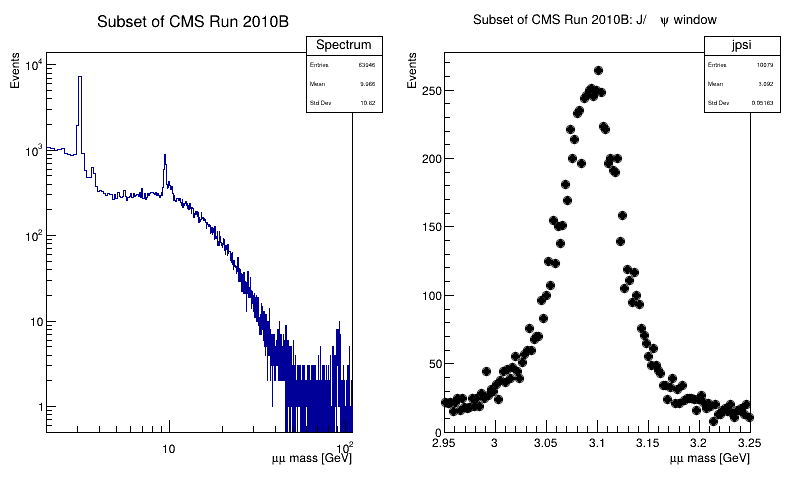

In [8]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()